In [ ]:
import pandas as pd
pd.set_option('display.max_columns', None)
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score,classification_report,confusion_matrix
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.inspection import permutation_importance, PartialDependenceDisplay
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC


from imblearn.over_sampling import SMOTE


import shap


from warnings import simplefilter
simplefilter("ignore")

In [ ]:
data = pd.read_csv('/content/healthcare-dataset-stroke-data.csv')

data.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [ ]:




print(f'The dataset has {data.shape[0]} rows and {data.shape[1]} columns.')

The dataset has 5110 rows and 12 columns.


In [ ]:
print(f'The dataset has {data.isna().sum().sum()} null values.')

The dataset has 201 null values.


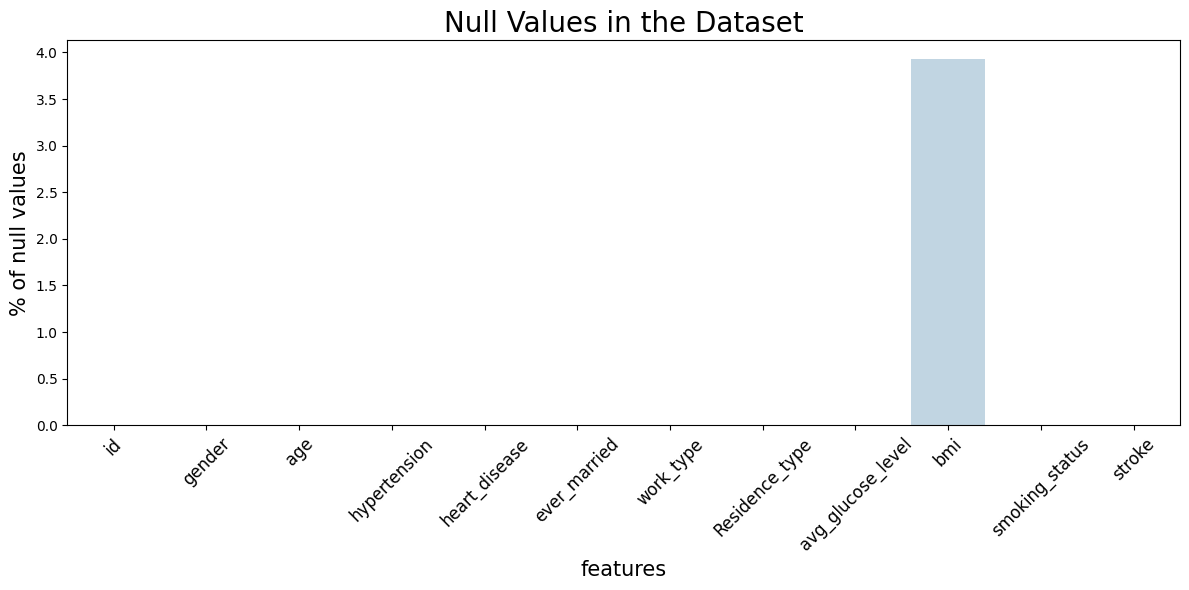

In [ ]:
def plot_nulls(data, title, x_axis_label, y_axis_label):

    # number of nulls for each column
    data_nulls = (data.apply(lambda x: x.isnull().value_counts()).T[True]/len(data)*100).reset_index(name='count')

    plt.figure(figsize=(12,6))
    sns.barplot(data_nulls, x="index", y="count", alpha=0.3)

    plt.title(title, fontsize=20)
    plt.xlabel(x_axis_label, fontsize=15)
    plt.xticks(rotation=45, fontsize=12)
    plt.ylabel(y_axis_label, fontsize=15)

    plt.tight_layout()
    plt.show()

plot_nulls(data,"Null Values in the Dataset", 'features', '% of null values')


In [ ]:
print(f'There are {data.duplicated().sum()} duplicate rows in the dataset.')

There are 0 duplicate rows in the dataset.


In [ ]:
cat_features = [col for col in data.columns if data[col].dtypes == 'O']

print(f'feature           cardinality')
for cat in cat_features:
    print('{:22s} {:2s}'.format(cat, str(data[cat].nunique())))

feature           cardinality
gender                 3 
ever_married           2 
work_type              5 
Residence_type         2 
smoking_status         4 


<Figure size 1200x600 with 0 Axes>

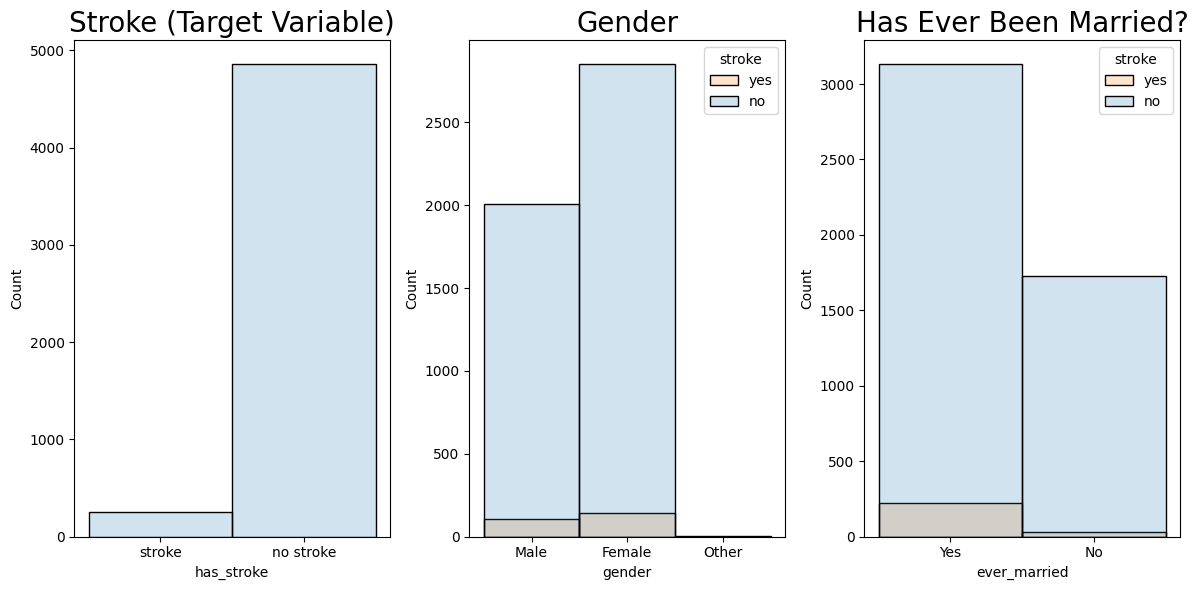

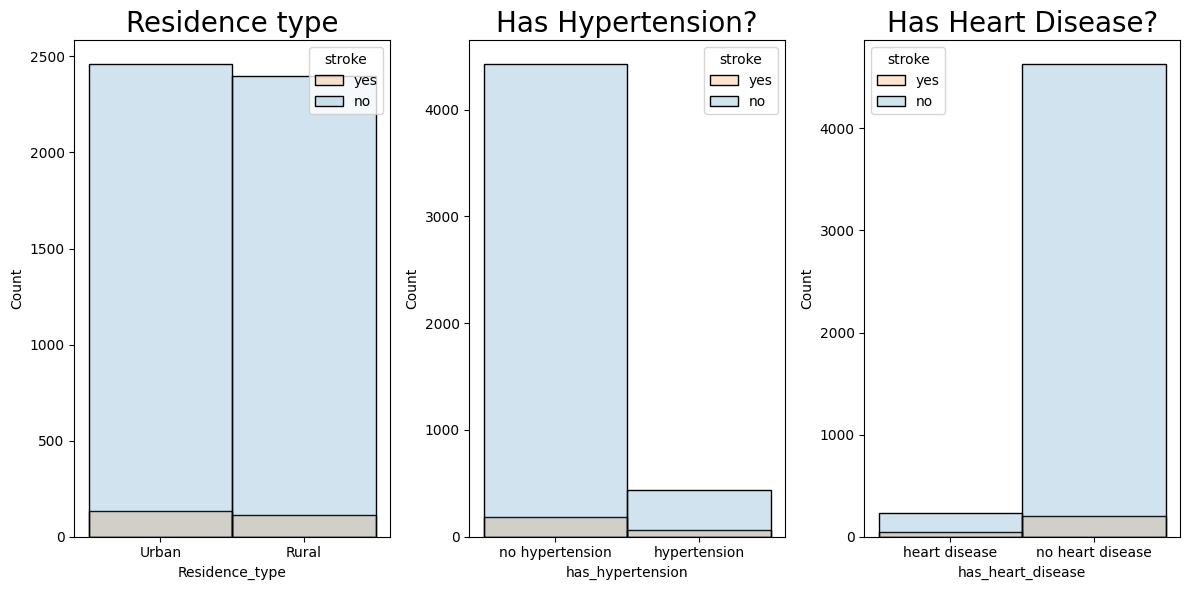

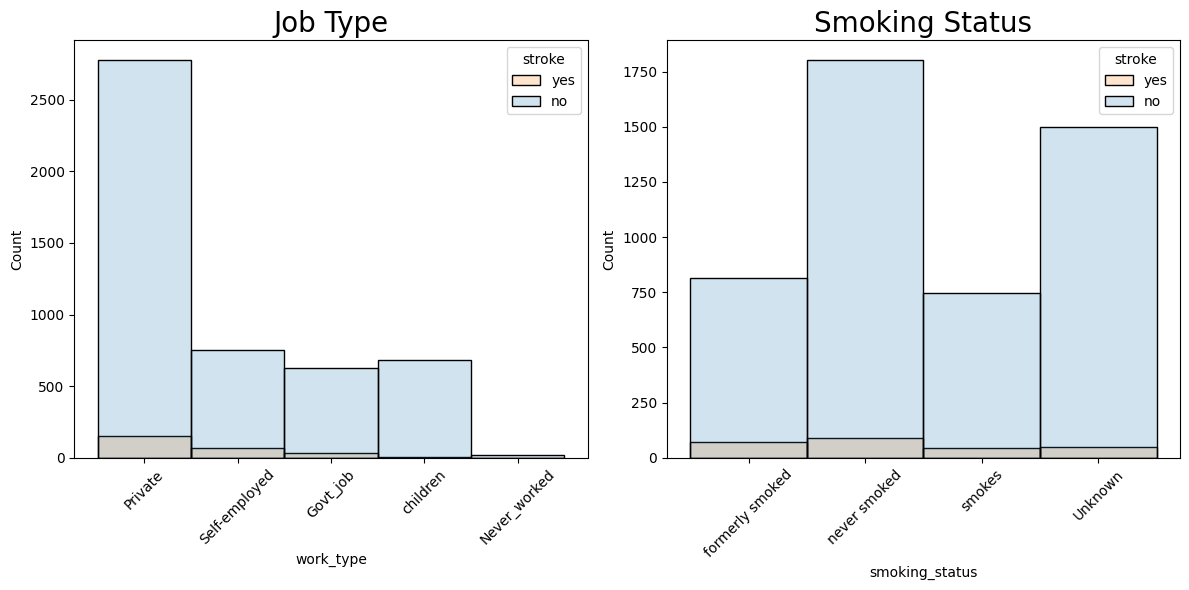

In [ ]:
has_stroke = {0:'no stroke', 1:'stroke'}
data['has_stroke'] = data['stroke'].map(has_stroke)

has_hypertension = {1:'hypertension', 0:'no hypertension'}
data['has_hypertension'] = data['hypertension'].map(has_hypertension)

has_heart_disease = {1:'heart disease', 0:'no heart disease'}
data['has_heart_disease'] = data['heart_disease'].map(has_heart_disease)


### Figures ###
bigfig = plt.figure(figsize=(12,6))

(top, central, bottom) = bigfig.subfigures(3,1)

### Top figure ###
top.subplots_adjust(left=.1, right=.9, wspace=.4, hspace=.4)

fig, (ax1,ax2,ax3) = plt.subplots(ncols=3, figsize=(12,6))

ax1 = sns.histplot(data=data, x='has_stroke', alpha=0.2, ax=ax1)
ax1.set_title('Stroke (Target Variable)', size=20)

ax2 = sns.histplot(data=data, x='gender', hue='stroke', alpha=0.2, ax=ax2)
ax2.legend(title='stroke', loc='upper right', labels=['yes', 'no'])
ax2.set_title('Gender', size=20)

ax3 = sns.histplot(data=data, x='ever_married', hue='stroke', alpha=0.2, ax=ax3)
ax3.legend(title='stroke', loc='upper right', labels=['yes', 'no'])
ax3.set_title('Has Ever Been Married?', size=20)

plt.tight_layout()

### Central figure ###
central.subplots_adjust(left=.1, right=.9, wspace=.4, hspace=.4)

fig, (ax1,ax2,ax3) = plt.subplots(ncols=3, figsize=(12,6))

ax1 = sns.histplot(data=data, x='Residence_type', hue='stroke', alpha=0.2, ax=ax1)
ax1.legend(title='stroke', loc='upper right', labels=['yes', 'no'])
ax1.set_title('Residence type', size=20)

ax2 = sns.histplot(data=data, x='has_hypertension', hue='stroke', alpha=0.2, ax=ax2)
ax2.legend(title='stroke', loc='upper right', labels=['yes', 'no'])
ax2.set_title('Has Hypertension?', size=20)

ax3 = sns.histplot(data=data, x='has_heart_disease', hue='stroke', alpha=0.2, ax=ax3)
ax3.legend(title='stroke', loc='upper left', labels=['yes', 'no'])
ax3.set_title('Has Heart Disease?', size=20)

plt.tight_layout()

### Bottom figure ###
bottom.subplots_adjust(left=.1, right=.9, wspace=.4, hspace=.4)

fig, (ax1,ax2) = plt.subplots(ncols=2, figsize=(12,6))

ax1 = sns.histplot(data=data, x='work_type', hue='stroke', alpha=0.2, ax=ax1)
ax1.legend(title='stroke', loc='upper right', labels=['yes', 'no'])
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45, size=10)
ax1.set_title('Job Type', size=20)

ax2 = sns.histplot(data=data, x='smoking_status', hue='stroke', alpha=0.2, ax=ax2)
ax2.legend(title='stroke', loc='upper right', labels=['yes', 'no'])
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=45, size=10)
ax2.set_title('Smoking Status', size=20)

plt.tight_layout()

<Figure size 1200x600 with 0 Axes>

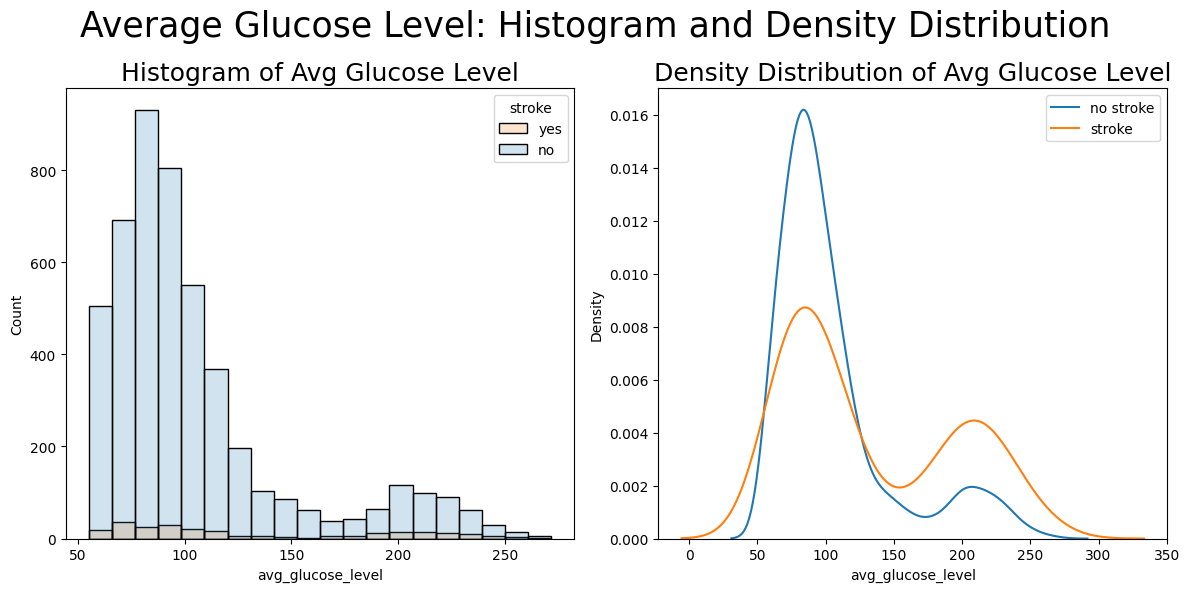

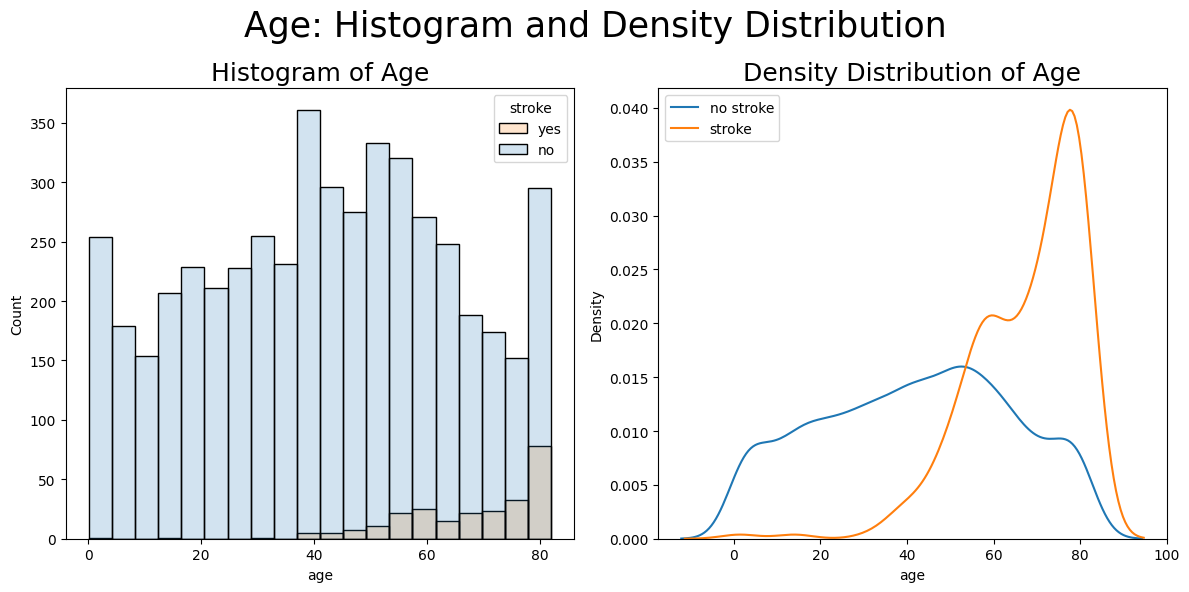

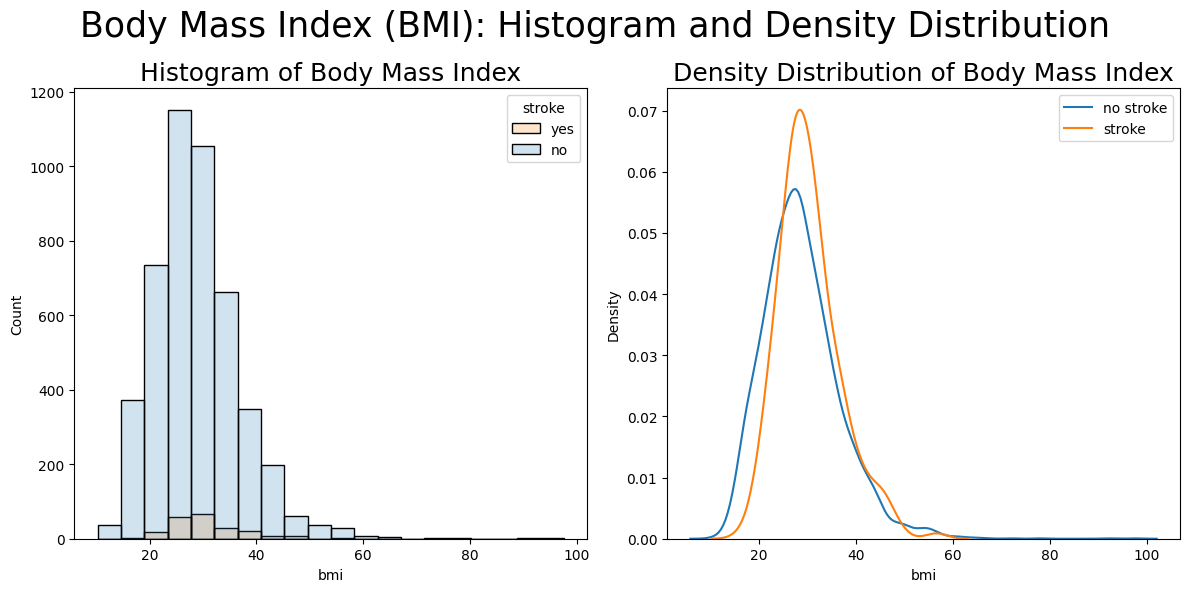

In [ ]:
### Figures ###
bigfig = plt.figure(figsize=(12,6))

(top, central, bottom) = bigfig.subfigures(3,1)

### Top figure ###
top.subplots_adjust(left=.1, right=.9, wspace=.4, hspace=.4)

fig, (ax1,ax2) = plt.subplots(ncols=2, figsize=(12,6))

ax1 = sns.histplot(data=data, x='avg_glucose_level', hue='stroke', bins=20, alpha=0.2, ax=ax1)
ax1.legend(title='stroke', loc='upper right', labels=['yes', 'no'])
ax1.set_title('Histogram of Avg Glucose Level', size=18)

ax2 = sns.kdeplot(data=data.loc[data.stroke == 0], x='avg_glucose_level', label='no stroke', ax=ax2)
ax2 = sns.kdeplot(data=data.loc[data.stroke == 1], x='avg_glucose_level', label='stroke', ax=ax2)
ax2.legend(loc='upper right')
ax2.set_title('Density Distribution of Avg Glucose Level', size=18)

plt.suptitle('Average Glucose Level: Histogram and Density Distribution', size=25)

plt.tight_layout()

### Central figure ###
central.subplots_adjust(left=.1, right=.9, wspace=.4, hspace=.4)

fig, (ax1,ax2) = plt.subplots(ncols=2, figsize=(12,6))

ax1 = sns.histplot(data=data, x='age', hue='stroke', bins=20, alpha=0.2, ax=ax1)
ax1.legend(title='stroke', loc='upper right', labels=['yes', 'no'])
ax1.set_title('Histogram of Age', size=18)

ax2 = sns.kdeplot(data=data.loc[data.stroke == 0], x='age', label='no stroke', ax=ax2)
ax2 = sns.kdeplot(data=data.loc[data.stroke == 1], x='age', label='stroke', ax=ax2)
ax2.legend(loc='upper left')
ax2.set_title('Density Distribution of Age', size=18)

plt.suptitle('Age: Histogram and Density Distribution', size=25)

plt.tight_layout()

### Bottom figure ###
bottom.subplots_adjust(left=.1, right=.9, wspace=.4, hspace=.4)

fig, (ax1,ax2) = plt.subplots(ncols=2, figsize=(12,6))

ax1 = sns.histplot(data=data, x='bmi', hue='stroke', bins=20, alpha=0.2, ax=ax1)
ax1.legend(title='stroke', loc='upper right', labels=['yes', 'no'])
ax1.set_title('Histogram of Body Mass Index', size=18)

ax2 = sns.kdeplot(data=data.loc[data.stroke == 0], x='bmi', label='no stroke', ax=ax2)
ax2 = sns.kdeplot(data=data.loc[data.stroke == 1], x='bmi', label='stroke', ax=ax2)
ax2.legend(loc='upper right')
ax2.set_title('Density Distribution of Body Mass Index', size=18)

plt.suptitle('Body Mass Index (BMI): Histogram and Density Distribution', size=25)

plt.tight_layout()

In [ ]:

data.drop(['has_stroke', 'has_hypertension', 'has_heart_disease'], axis=1, inplace=True)

In [ ]:
data_no_nulls = data.dropna(axis=0)

num_columns = [col for col in data.columns if (data[col].dtypes != 'O') & (col not in ['id', 'bmi'])]

print(f'feature             mean (w/ nulls)             mean (no nulls)             rel. difference (%)\n')
def compare_mean(data, data_nn):
    for col in num_columns:
        print('{:20s} {:8.3f} {:28.3f} {:30.1f}'.format(col, data[col].mean(), data_nn[col].mean(), abs(data[col].mean() - data_nn[col].mean()) / data[col].mean() * 100))

compare_mean(data, data_no_nulls)

feature             mean (w/ nulls)             mean (no nulls)             rel. difference (%)

age                    43.227                       42.865                            0.8
hypertension            0.097                        0.092                            5.7
heart_disease           0.054                        0.050                            8.4
avg_glucose_level     106.148                      105.305                            0.8
stroke                  0.049                        0.043                           12.6


In [ ]:
print(f"Stroke events: {data['stroke'].value_counts()[1]} (w/ nulls), {data_no_nulls['stroke'].value_counts()[1]} (no nulls).")

print(f"Relative difference in the number of strokes = {(data['stroke'].value_counts()[1] - data_no_nulls['stroke'].value_counts()[1]) / data['stroke'].value_counts()[1] * 100:.0f}%")

print(f"Relative difference in the dataset length = {(len(data) - len(data_no_nulls)) / len(data) * 100:.0f}%")

Stroke events: 249 (w/ nulls), 209 (no nulls).
Relative difference in the number of strokes = 16%
Relative difference in the dataset length = 4%


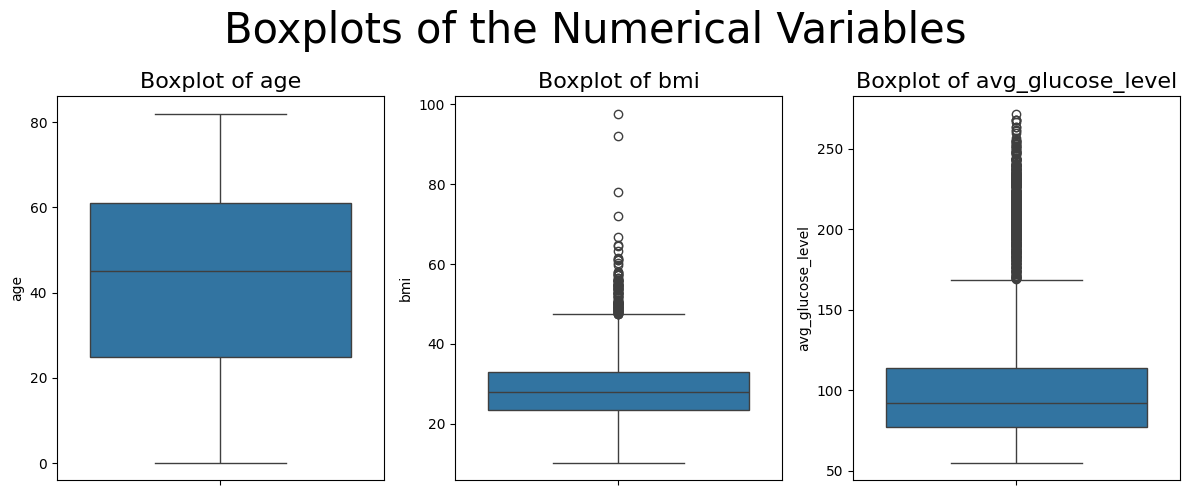

In [ ]:

num_features = ['age', 'bmi', 'avg_glucose_level']

fig,(ax1,ax2,ax3) = plt.subplots(ncols=3, figsize=(12,5))

ax1 = sns.boxplot(data[num_features[0]],ax=ax1)
ax1.set_title('Boxplot of '+str(num_features[0]),fontsize=16)

ax2 = sns.boxplot(data[num_features[1]],ax=ax2)
ax2.set_title('Boxplot of '+str(num_features[1]),fontsize=16)

ax3 = sns.boxplot(data[num_features[2]],ax=ax3)
ax3.set_title('Boxplot of '+str(num_features[2]),fontsize=16)

plt.suptitle('Boxplots of the Numerical Variables',size=30)

plt.tight_layout()

In [ ]:
outliers_perc = []

def outliers_perc_search(data, num_features):
    for k,v in data[num_features].items():
        # Column must be of numeric type (not object)
        if data[k].dtype != 'O':
            q1 = v.quantile(0.25)
            q3 = v.quantile(0.75)
            irq = q3 - q1
            v_col = v[(v <= q1 - 1.5 * irq) | (v >= q3 + 1.5 * irq)]
            perc = np.shape(v_col)[0] * 100.0 / np.shape(data)[0]
            out_tuple = (k,int(perc))
            outliers_perc.append(out_tuple)
            print("Column %s outliers = %.1f%%" % (k,perc))

outliers_perc_search(data, num_features)

Column age outliers = 0.0%
Column bmi outliers = 2.2%
Column avg_glucose_level outliers = 12.3%


In [ ]:
capped_cols = ['bmi', 'avg_glucose_level']

def remove_outliers_iqr(data, column):

    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Filter the data
    filtered_data = data[(data[column] >= lower_bound) & (data[column] <= upper_bound)]
    return filtered_data


for col in capped_cols:
    data = remove_outliers_iqr(data, col)

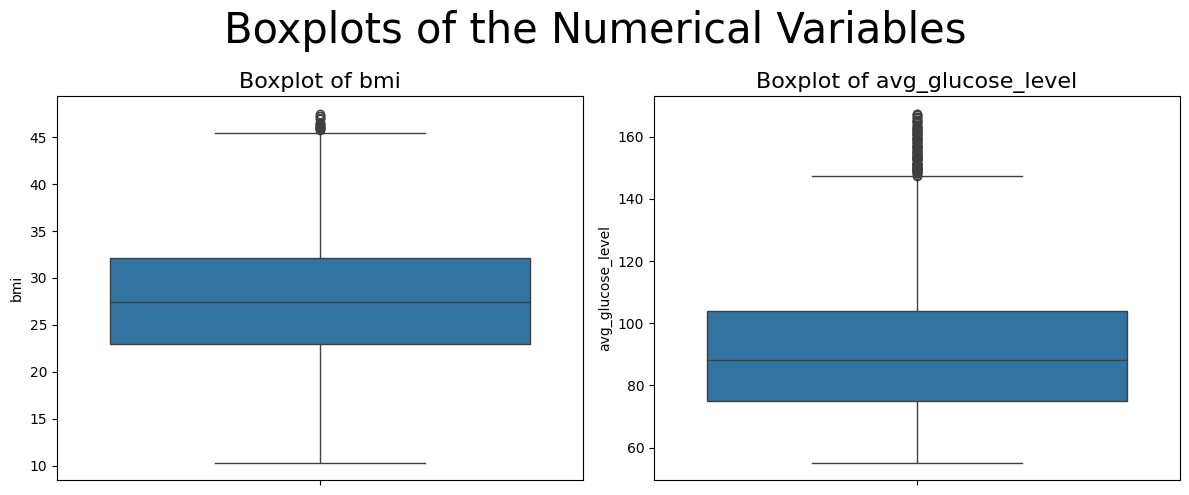

In [ ]:
fig,(ax1,ax2) = plt.subplots(ncols=2, figsize=(12,5))

ax1 = sns.boxplot(y=data[capped_cols[0]],ax=ax1)
ax1.set_title('Boxplot of '+str(capped_cols[0]),fontsize=16)

ax2 = sns.boxplot(y=data[capped_cols[1]],ax=ax2)
ax2.set_title('Boxplot of '+str(capped_cols[1]),fontsize=16)

plt.suptitle('Boxplots of the Numerical Variables',size=30)

plt.tight_layout()

In [ ]:
data = data.sample(frac=1, random_state=42)

X = data.drop(['stroke', 'id'], axis=1)
y = data['stroke']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=42)

In [ ]:
train_stroke_index = y_train[y_train == 0].index.to_list()
train_no_stroke_index = y_train[y_train == 1].index.to_list()

test_stroke_index = y_test[y_test == 0].index.to_list()
test_no_stroke_index = y_test[y_test == 1].index.to_list()

In [ ]:
bmi_stroke_mean = X_train.loc[train_stroke_index]['bmi'].mean()
bmi_no_stroke_mean = X_train.loc[train_no_stroke_index]['bmi'].mean()

X_train.loc[(X_train['bmi'].isna()) & (X_train.index.isin(train_stroke_index)), 'bmi'] = bmi_stroke_mean
X_train.loc[(X_train['bmi'].isna()) & (X_train.index.isin(train_no_stroke_index)), 'bmi'] = bmi_no_stroke_mean

X_test.loc[(X_test['bmi'].isna()) & (X_test.index.isin(test_stroke_index)), 'bmi'] = bmi_stroke_mean
X_test.loc[(X_test['bmi'].isna()) & (X_test.index.isin(test_no_stroke_index)), 'bmi'] = bmi_no_stroke_mean

In [ ]:


# Check for null values in the entire DataFrame
print(data.isnull().sum())


id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64


In [ ]:
# Categorical columns in the training data
object_cols = [col for col in X_train.columns if X_train[col].dtype == "object"]

# Columns that can be safely ordinal encoded
good_label_cols = [col for col in object_cols if
                   set(X_test[col]).issubset(set(X_train[col]))]

# Problematic columns that will be dropped from the dataset
bad_label_cols = list(set(object_cols)-set(good_label_cols))

print('Categorical columns that will be ordinal encoded:', good_label_cols)
print('\nCategorical columns that will be dropped from the dataset:', bad_label_cols)

Categorical columns that will be ordinal encoded: ['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']

Categorical columns that will be dropped from the dataset: []


In [ ]:
LE_cols = ['ever_married', 'Residence_type',  'gender']

encoder1 = LabelEncoder()

for col in LE_cols:
    X_train[col] = encoder1.fit_transform(X_train[col])
    X_test[col]  = encoder1.transform(X_test[col])

In [ ]:
### One-hot encoding ###
OHE_cols = ['work_type', 'smoking_status']

#encoder2 = OneHotEncoder(handle_unknown='ignore')
encoder2 = OneHotEncoder(sparse_output=False, handle_unknown='ignore').set_output(transform="pandas")

# Fit and transform the categorical columns
OHE_train = pd.DataFrame(encoder2.fit_transform(X_train[OHE_cols]))
OHE_test  = pd.DataFrame(encoder2.transform(X_test[OHE_cols]))

# One-hot encoding removed index; put it back
OHE_train.index = X_train.index
OHE_test.index  = X_test.index

# Remove categorical columns (will replace with one-hot encoding)
num_train = X_train.drop(OHE_cols, axis=1)
num_test  = X_test.drop(OHE_cols, axis=1)

# Add one-hot encoded columns to numerical features
OHE_X_train = pd.concat([num_train, OHE_train], axis=1)
OHE_X_test  = pd.concat([num_test, OHE_test], axis=1)

In [ ]:
scaler = StandardScaler()

OHE_X_train[['age', 'bmi', 'avg_glucose_level']] = scaler.fit_transform(OHE_X_train[['age', 'bmi', 'avg_glucose_level']])
OHE_X_test[['age', 'bmi', 'avg_glucose_level']]  = scaler.transform(OHE_X_test[['age', 'bmi', 'avg_glucose_level']])

OHE_X_train.head()

,gender,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
3262,1,0.275869,0,0,1,0,-0.127271,-0.839968,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
2312,0,1.566954,0,0,1,1,0.841900,0.600979,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
3813,1,0.053268,0,0,1,0,-1.042100,0.630999,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1835,0,0.498470,0,1,1,1,-0.254368,1.741730,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
3190,0,0.498470,0,0,1,1,0.683366,-0.809949,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


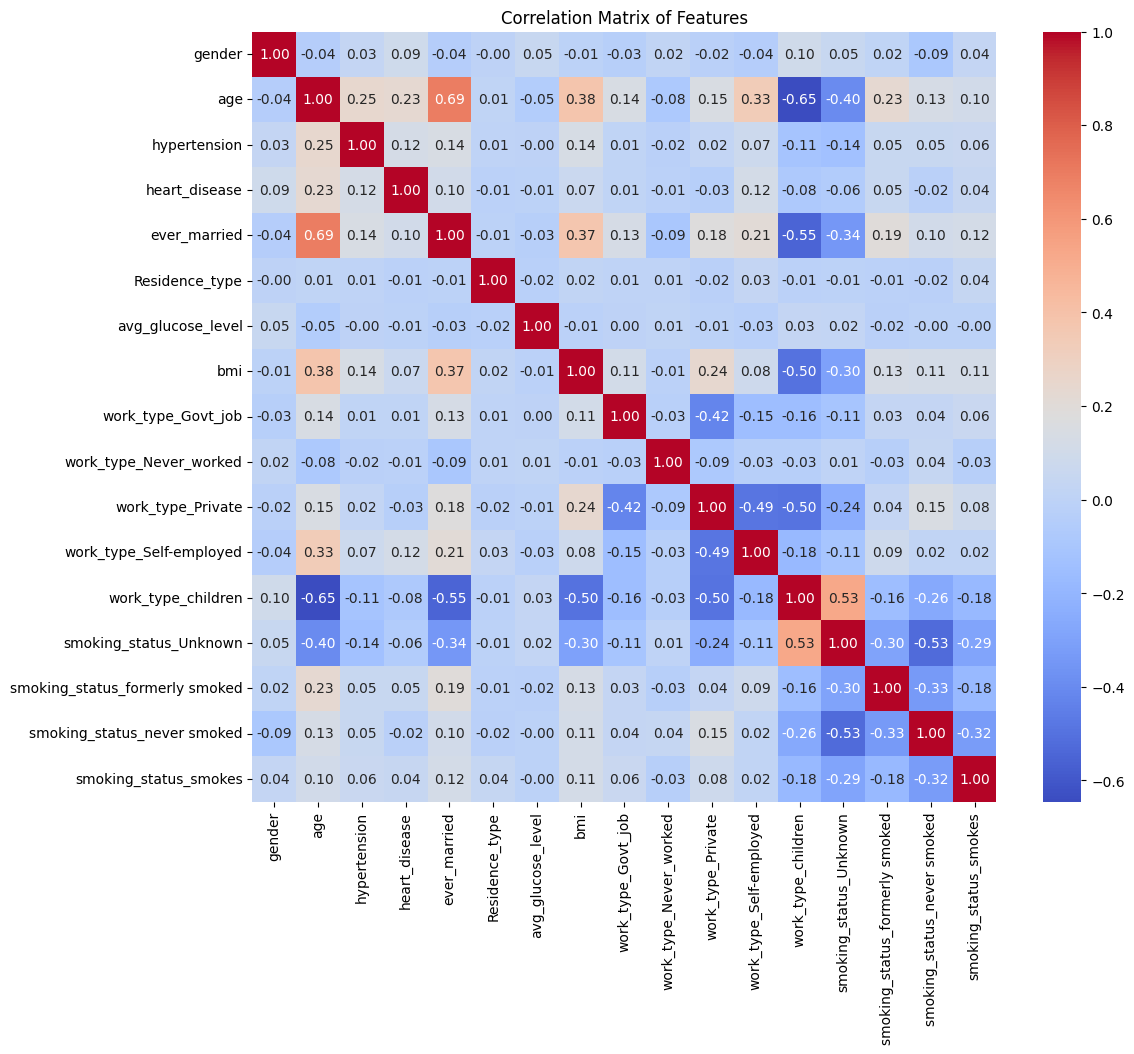

In [ ]:


# Calculate the correlation matrix
correlation_matrix = OHE_X_train.corr()

# Create a heatmap of the correlation matrix
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Features')
plt.show()


In [ ]:
# OverSampler object
ros = SMOTE(random_state=42, sampling_strategy='minority')

X_resampled, y_resampled = ros.fit_resample(OHE_X_train, y_train)

X_resampled.shape, y_resampled.shape, X_train.shape, y_train.shape

((5768, 17), (5768,), (2979, 10), (2979,))

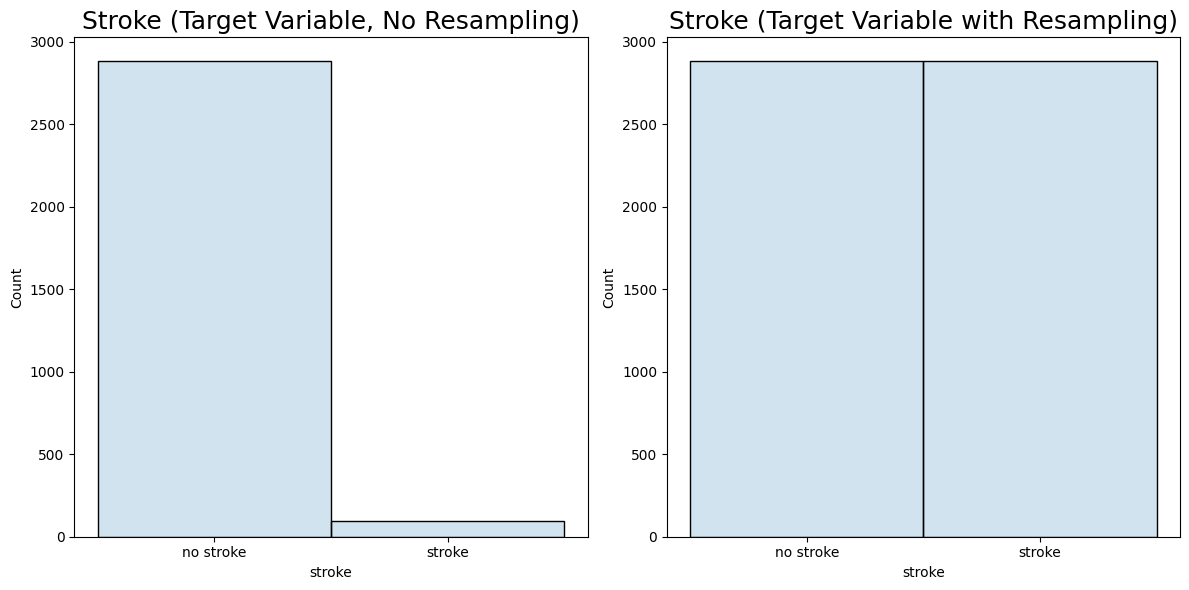

In [ ]:
y_train_has_stroke     = y_train.map(has_stroke)
y_resampled_has_stroke = y_resampled.map(has_stroke)

fig, (ax1,ax2) = plt.subplots(ncols=2, figsize=(12,6))

ax1 = sns.histplot(data=y_train_has_stroke, alpha=0.2, ax=ax1)
ax1.set_title('Stroke (Target Variable, No Resampling)', size=18)

ax2 = sns.histplot(data=y_resampled_has_stroke, alpha=0.2, ax=ax2)
ax2.set_title('Stroke (Target Variable with Resampling)', size=18)

plt.tight_layout()

  0%|          | 0/1000 [00:00<?, ?it/s]

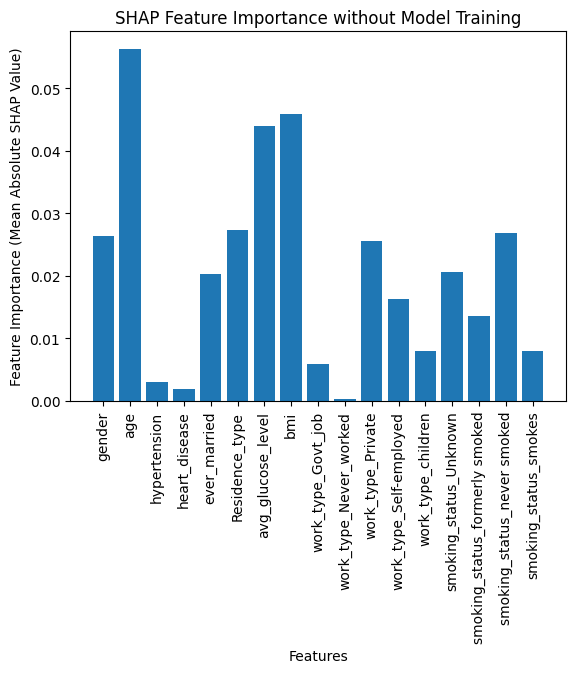

In [ ]:
def predict_fn(X):

    return np.mean(X, axis=1)

# Background data for the explainer (a sample from your data)
background_data = shap.sample(X_resampled, 1000)  # Using 1000 samples for the background

# Create the KernelExplainer
explainer = shap.KernelExplainer(predict_fn, background_data)

# Calculate SHAP values for a subset of your data (e.g., the first 1000 samples)
shap_values = explainer.shap_values(X_resampled[:1000])

# Get feature importances based on mean absolute SHAP values
feature_importances = np.mean(np.abs(shap_values), axis=0)

# Print or visualize feature importances (example using a bar plot)
import matplotlib.pyplot as plt
plt.bar(X_resampled.columns, feature_importances)
plt.xticks(rotation=90)
plt.xlabel("Features")
plt.ylabel("Feature Importance (Mean Absolute SHAP Value)")
plt.title("SHAP Feature Importance without Model Training")
plt.show()



In [ ]:
# Select top features based on importance (example: selecting top 5 features)
top_features = X_resampled.columns[np.argsort(feature_importances)[-5:]]
print("Top 5 features:", top_features)

Top 5 features: Index(['smoking_status_never smoked', 'Residence_type', 'avg_glucose_level',
       'bmi', 'age'],
      dtype='object')


In [ ]:
# Use only the top 5 selected features from SHAP
top_features = ['Residence_type', 'smoking_status_never smoked', 'bmi', 'avg_glucose_level', 'age']

In [ ]:
# Select only top 5 features for training & testing
X_train_selected = X_resampled[top_features]
X_test_selected = OHE_X_test[top_features]

In [ ]:
# Updated models with fine-tuned parameters
log_reg = LogisticRegression(C=1, solver='liblinear', random_state=42)
rf = RandomForestClassifier(n_estimators=200, max_depth=5, random_state=42)
xgb = XGBClassifier(use_label_encoder=False, eval_metric="logloss", n_estimators=150,
                    max_depth=4, learning_rate=0.1, random_state=42)
knn = KNeighborsClassifier(n_neighbors=7, weights='distance')
svm = SVC(kernel='rbf', C=2.0, gamma=0.01, probability=True, random_state=42)

# Model dictionary
models = {
    "Logistic Regression": log_reg,
    "Random Forest": rf,
    "XGBoost": xgb,
    "K-Nearest Neighbors": knn,
    "Support Vector Machine": svm
}

# Train and evaluate models
for name, model in models.items():
    print(f"Training {name} on top 5 features...")

    model.fit(X_train_selected, y_resampled)  # Train the model

    # Predictions
    y_train_pred = model.predict(X_train_selected)
    y_test_pred = model.predict(X_test_selected)

    # Evaluation
    print(f"\n{name} - Training Set Performance:\n")
    print(classification_report(y_resampled, y_train_pred))

    print(f"\n{name} - Test Set Performance:\n")
    print(classification_report(y_test, y_test_pred))
    print("=" * 80)

Training Logistic Regression on top 5 features...

Logistic Regression - Training Set Performance:

              precision    recall  f1-score   support

           0       0.80      0.74      0.77      2884
           1       0.76      0.81      0.78      2884

    accuracy                           0.78      5768
   macro avg       0.78      0.78      0.78      5768
weighted avg       0.78      0.78      0.78      5768


Logistic Regression - Test Set Performance:

              precision    recall  f1-score   support

           0       0.99      0.76      0.86      1236
           1       0.09      0.73      0.16        41

    accuracy                           0.76      1277
   macro avg       0.54      0.75      0.51      1277
weighted avg       0.96      0.76      0.84      1277

Training Random Forest on top 5 features...

Random Forest - Training Set Performance:

              precision    recall  f1-score   support

           0       0.96      0.72      0.83      2884
   

In [ ]:
# Whale Optimization Algorithm (WOA) for Hyperparameter Tuning
def whale_optimization(obj_function, bounds, whales=10, iterations=10, a=2):
    dim = len(bounds)
    positions = np.random.uniform([b[0] for b in bounds], [b[1] for b in bounds], (whales, dim))
    fitness = np.array([obj_function(ind) for ind in positions])
    best_idx = np.argmax(fitness)
    best_position = positions[best_idx]

    for t in range(iterations):
        a_t = a - t * (a / iterations)
        for i in range(whales):
            A = 2 * a_t * np.random.rand(dim) - a_t
            C = 2 * np.random.rand(dim)
            p = np.random.rand()
            if p < 0.5:
                D = np.abs(C * best_position - positions[i])
                positions[i] = best_position - A * D
            else:
                positions[i] = (best_position + positions[i]) / 2

            # Ensure values stay within bounds
            positions[i] = np.clip(positions[i], [b[0] for b in bounds], [b[1] for b in bounds])

        fitness = np.array([obj_function(ind) for ind in positions])
        best_idx = np.argmax(fitness)
        best_position = positions[best_idx]

    return best_position, fitness[best_idx]

# Objective function for XGBoost
def objective_function(params):
    n_estimators, max_depth, learning_rate, subsample = params
    n_estimators = int(n_estimators)
    max_depth = int(max_depth) if max_depth > 0 else None
    learning_rate = max(0.01, min(0.3, learning_rate))  # Keep learning rate between 0.01 and 0.3
    subsample = max(0.3, min(1.0, subsample))  # Ensure subsample is between 0.3 and 1.0

    clf = XGBClassifier(n_estimators=n_estimators, max_depth=max_depth,
                        learning_rate=learning_rate, subsample=subsample,
                        use_label_encoder=False, eval_metric='logloss', random_state=42)
    clf.fit(X_resampled, y_resampled)
    predictions = clf.predict(OHE_X_test)
    return accuracy_score(y_test, predictions)

# Define hyperparameter bounds for WOA (based on given XGBoost params)
bounds = [(100, 200), (3, 6), (0.05, 0.2), (0.5, 1.0)]  # Tuned to match base parameters

# Run Whale Optimization Algorithm
best_params, best_fitness = whale_optimization(objective_function, bounds)

best_n_estimators, best_max_depth, best_learning_rate, best_subsample = best_params
best_n_estimators = int(best_n_estimators)
best_max_depth = int(best_max_depth) if best_max_depth > 0 else None

# Train the optimized XGBoost model
best_xgb = XGBClassifier(n_estimators=best_n_estimators, max_depth=best_max_depth,
                         learning_rate=best_learning_rate, subsample=best_subsample,
                         use_label_encoder=False, eval_metric='logloss', random_state=42)
best_xgb.fit(X_resampled, y_resampled)
final_predictions = best_xgb.predict(OHE_X_test)
final_accuracy = accuracy_score(y_test, final_predictions) * 100

# Output results
print("Optimized XGBoost Classifier with Whale Optimization Algorithm")
print(f"Best Parameters: n_estimators={best_n_estimators}, max_depth={best_max_depth}, ")
print(f"      learning_rate={best_learning_rate:.3f}, subsample={best_subsample:.2f}")
print(f"Final Accuracy: {final_accuracy:.2f}%")
print("Classification Report:")
print(classification_report(y_test, final_predictions))


Optimized XGBoost Classifier with Whale Optimization Algorithm
Best Parameters: n_estimators=169, max_depth=6, 
      learning_rate=0.194, subsample=0.58
Final Accuracy: 93.03%
Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.95      0.96      1236
           1       0.12      0.20      0.15        41

    accuracy                           0.93      1277
   macro avg       0.55      0.57      0.56      1277
weighted avg       0.95      0.93      0.94      1277



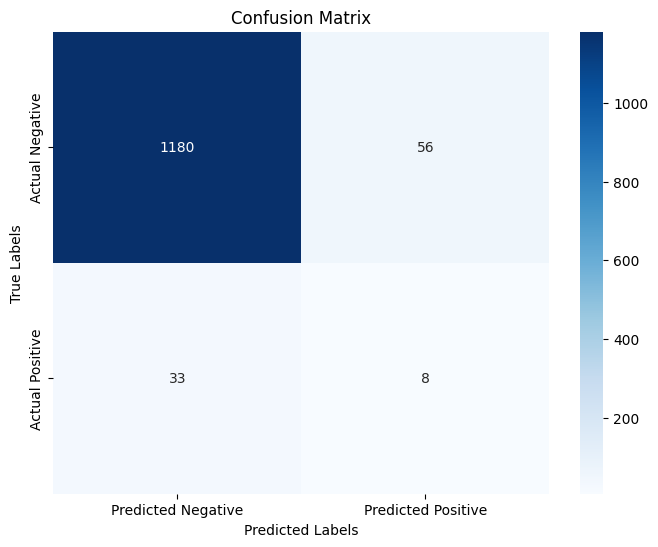

In [ ]:
# Confusion Matrix
cm = confusion_matrix(y_test, final_predictions)

# Plot Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted Negative', 'Predicted Positive'],
            yticklabels=['Actual Negative', 'Actual Positive'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

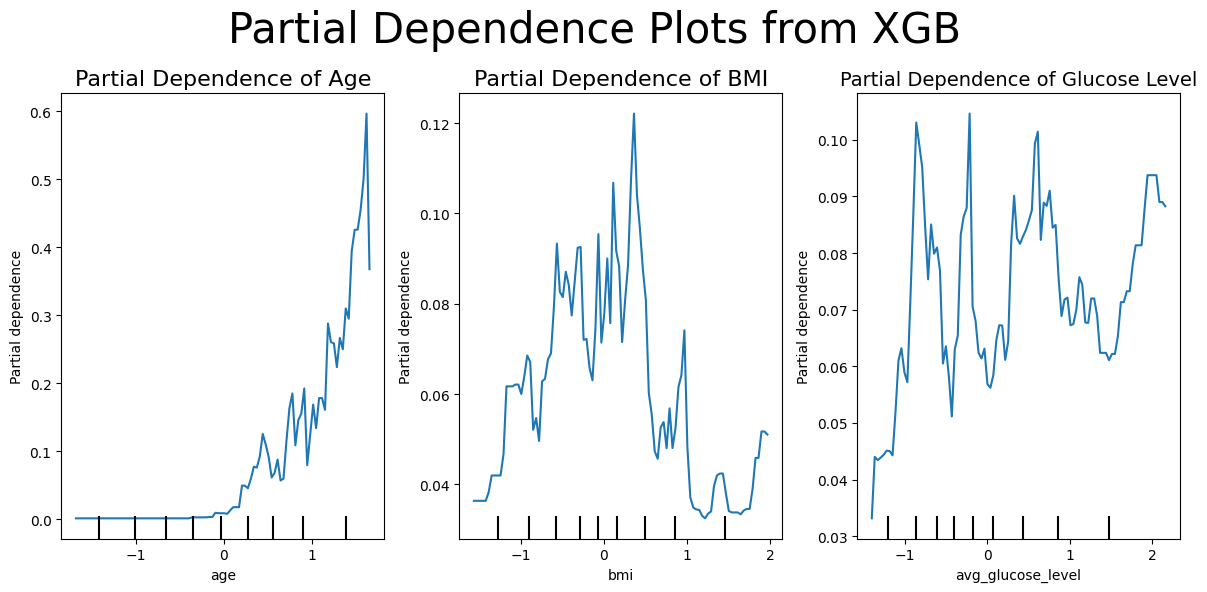

In [ ]:
fig,(ax1,ax2,ax3) = plt.subplots(ncols=3, figsize=(12,6))

ax1 = PartialDependenceDisplay.from_estimator(best_xgb, OHE_X_test, ['age'], ax=ax1)
plt.title('Partial Dependence of Age', size=16)

ax2 = PartialDependenceDisplay.from_estimator(best_xgb, OHE_X_test, ['bmi'], ax=ax2)
plt.title('Partial Dependence of BMI', size=16)

ax3 = PartialDependenceDisplay.from_estimator(best_xgb, OHE_X_test, ['avg_glucose_level'], ax=ax3)
plt.title('Partial Dependence of Glucose Level', size=14)

plt.suptitle('Partial Dependence Plots from XGB', size=30)

plt.tight_layout()

 95%|=================== | 1216/1277 [00:13<00:00]       

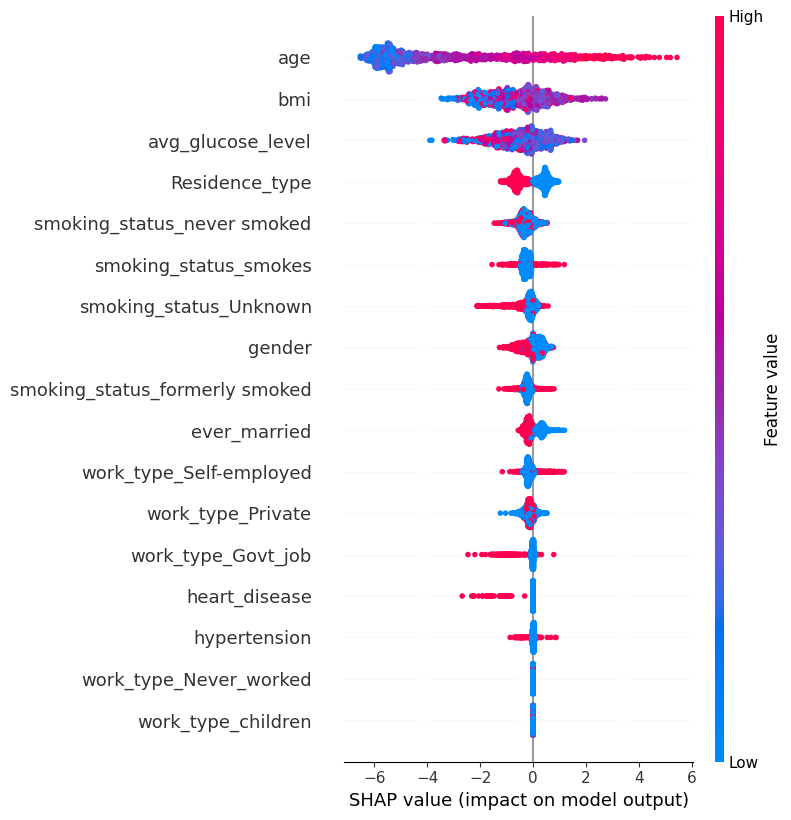

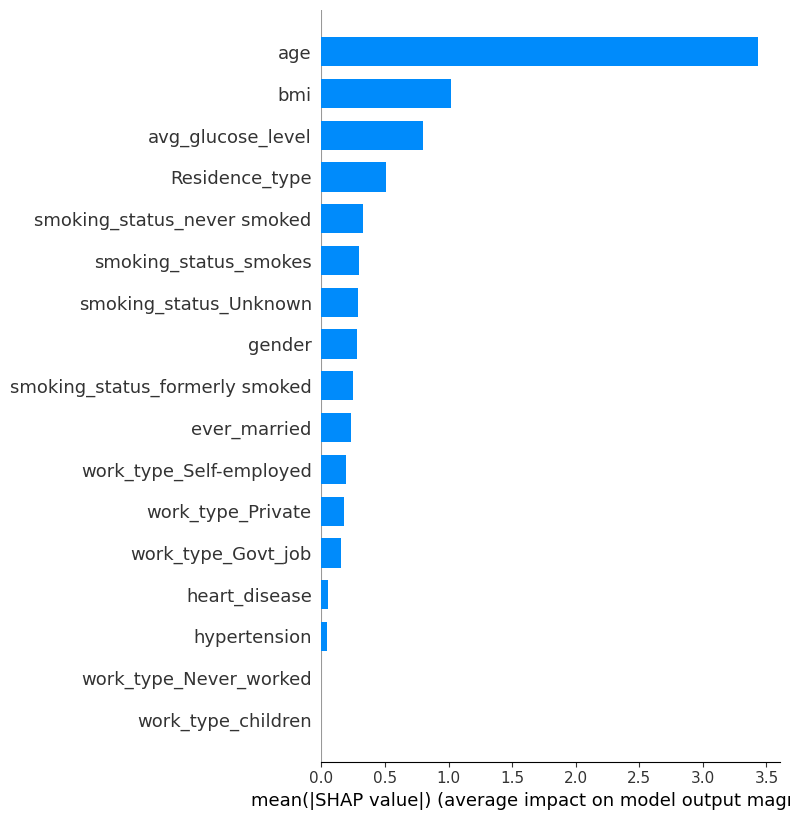

<Figure size 1200x600 with 0 Axes>

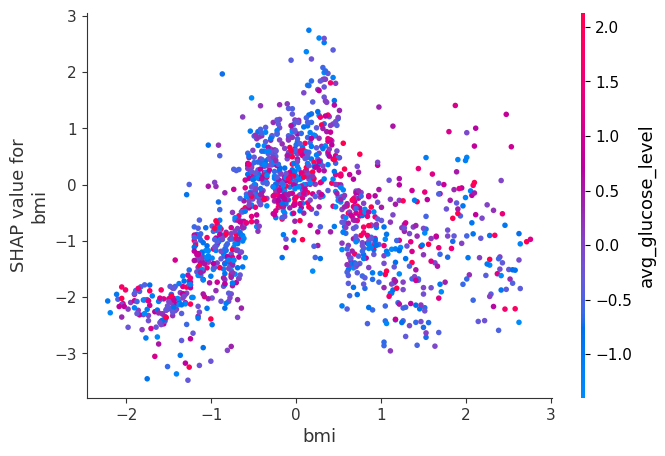

In [ ]:
# Initialize SHAP explainer with trained model
explainer = shap.Explainer(best_xgb, X_resampled)

# Compute SHAP values for test data
shap_values = explainer(OHE_X_test)

# Summary plot - Feature Importance & Interactions
plt.figure(figsize=(12, 6))
shap.summary_plot(shap_values, OHE_X_test, show=True)

# Interaction Summary Plot (for deeper feature interactions)
plt.figure(figsize=(12, 6))
shap.summary_plot(shap_values, OHE_X_test, plot_type="bar")

# Individual feature interaction (Example: 'bmi' vs. others)
plt.figure(figsize=(12, 6))
shap.dependence_plot("bmi", shap_values.values, OHE_X_test, interaction_index="avg_glucose_level")


CLINICAL FACTORS

In [ ]:
heart_data = pd.read_csv("/content/Heart.csv")


In [ ]:
 #Print first 5 rows of the Dataset
heart_data.head()

,Unnamed: 0,Age,Sex,ChestPain,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,Thal,AHD
0,1,63,1,typical,145,233,1,2,150,0,2.3,3,0.0,fixed,No
1,2,67,1,asymptomatic,160,286,0,2,108,1,1.5,2,3.0,normal,Yes
2,3,67,1,asymptomatic,120,229,0,2,129,1,2.6,2,2.0,reversable,Yes
3,4,37,1,nonanginal,130,250,0,0,187,0,3.5,3,0.0,normal,No
4,5,41,0,nontypical,130,204,0,2,172,0,1.4,1,0.0,normal,No


In [ ]:
# Numbers of Rows and Columns in the Dataset

heart_data.shape

(303, 15)

In [ ]:
# Getting some info about the Data

heart_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  303 non-null    int64  
 1   Age         303 non-null    int64  
 2   Sex         303 non-null    int64  
 3   ChestPain   303 non-null    object 
 4   RestBP      303 non-null    int64  
 5   Chol        303 non-null    int64  
 6   Fbs         303 non-null    int64  
 7   RestECG     303 non-null    int64  
 8   MaxHR       303 non-null    int64  
 9   ExAng       303 non-null    int64  
 10  Oldpeak     303 non-null    float64
 11  Slope       303 non-null    int64  
 12  Ca          299 non-null    float64
 13  Thal        301 non-null    object 
 14  AHD         303 non-null    object 
dtypes: float64(2), int64(10), object(3)
memory usage: 35.6+ KB


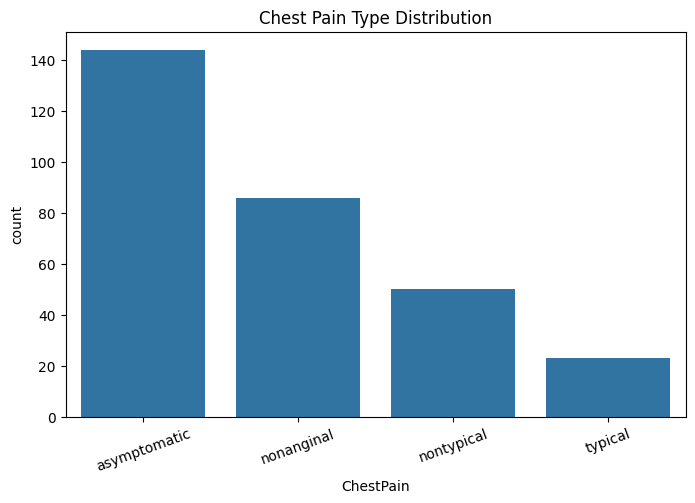

In [ ]:
plt.figure(figsize=(8, 5))
sns.countplot(x=heart_data['ChestPain'], order=heart_data['ChestPain'].value_counts().index)
plt.title("Chest Pain Type Distribution")
plt.xticks(rotation=20)
plt.show()


<Figure size 800x500 with 0 Axes>

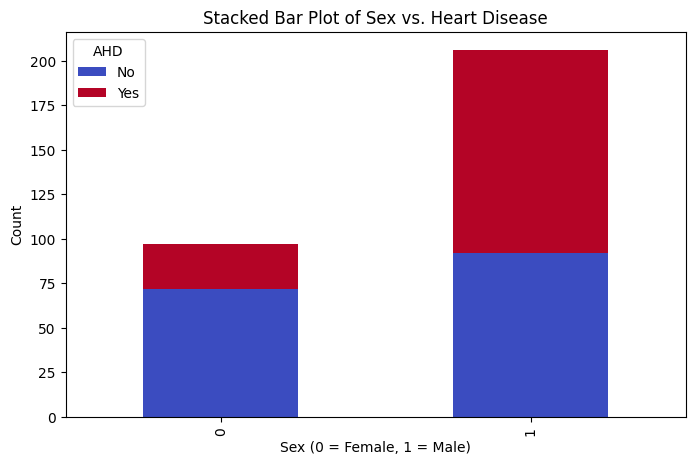

In [ ]:
plt.figure(figsize=(8, 5))
pd.crosstab(heart_data['Sex'], heart_data['AHD']).plot(kind='bar', stacked=True, colormap="coolwarm", figsize=(8, 5))
plt.title("Stacked Bar Plot of Sex vs. Heart Disease")
plt.xlabel("Sex (0 = Female, 1 = Male)")
plt.ylabel("Count")
plt.legend(title="AHD")
plt.show()


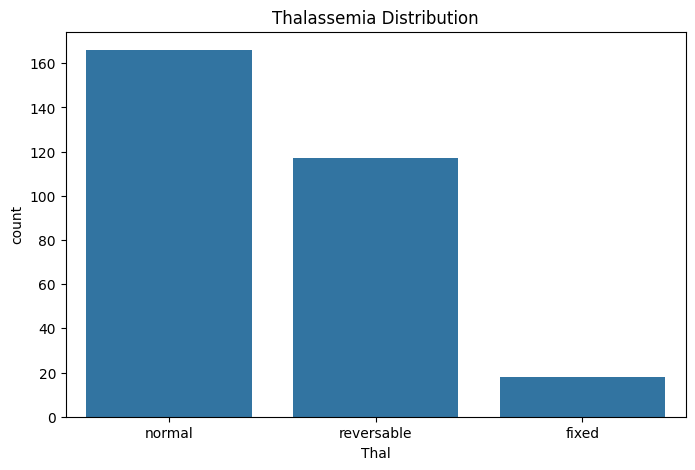

In [ ]:
plt.figure(figsize=(8, 5))
sns.countplot(x=heart_data['Thal'], order=heart_data['Thal'].value_counts().index)
plt.title("Thalassemia Distribution")
plt.show()


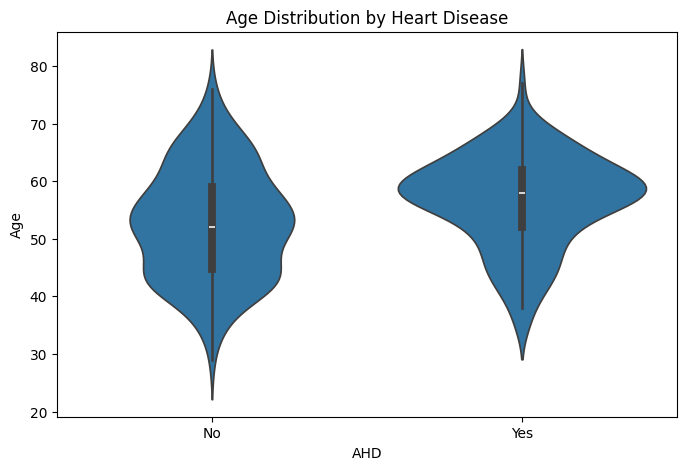

In [ ]:
plt.figure(figsize=(8, 5))
sns.violinplot(x=heart_data['AHD'], y=heart_data['Age'])
plt.title("Age Distribution by Heart Disease")
plt.show()


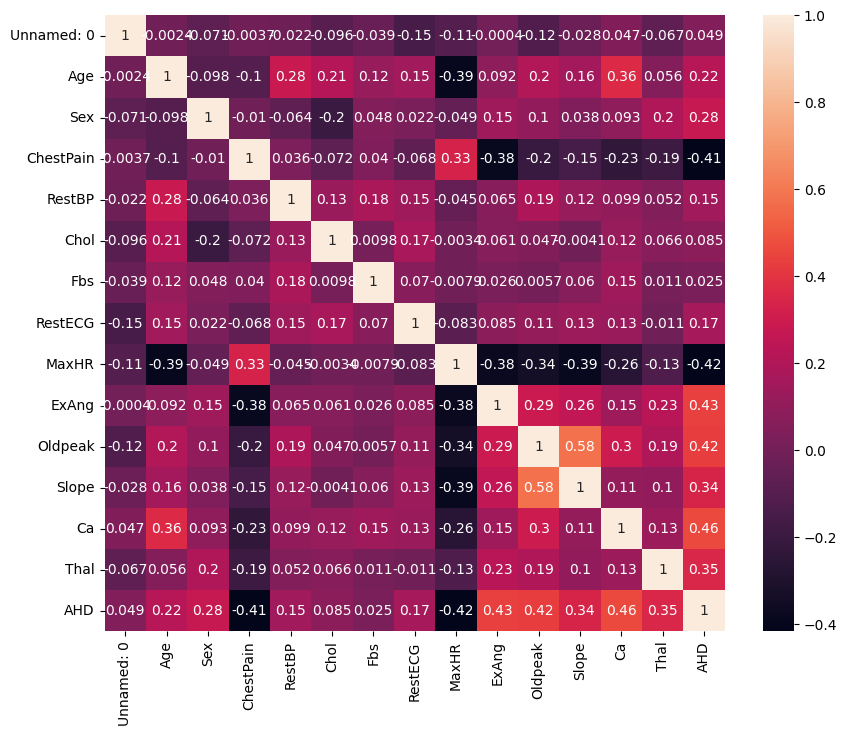

In [ ]:
encoder = LabelEncoder()

# Iterate through columns and encode object (string) type columns
for col in heart_data.select_dtypes(include=['object']).columns:
    heart_data[col] = encoder.fit_transform(heart_data[col])

# Now calculate the correlation and plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(heart_data.corr(), annot=True)  # Generate the heatmap
plt.show()

In [ ]:
# Checking for missing values

heart_data.isnull().sum()

,0
Unnamed: 0,0
Age,0
Sex,0
ChestPain,0
RestBP,0
Chol,0
Fbs,0
RestECG,0
MaxHR,0
ExAng,0


In [ ]:
# Fill missing values with the mean
heart_data.fillna(heart_data.mean(), inplace=True)

# Check for remaining null values
print(heart_data.isnull().sum())


Unnamed: 0    0
Age           0
Sex           0
ChestPain     0
RestBP        0
Chol          0
Fbs           0
RestECG       0
MaxHR         0
ExAng         0
Oldpeak       0
Slope         0
Ca            0
Thal          0
AHD           0
dtype: int64


In [ ]:
#Statistical measures about the data

heart_data.describe()


,Unnamed: 0,Age,Sex,ChestPain,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,Thal,AHD
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,152.000000,54.438944,0.679868,0.841584,131.689769,246.693069,0.148515,0.990099,149.607261,0.326733,1.039604,1.600660,0.672241,1.339934,0.458746
std,87.612784,9.038662,0.467299,0.960126,17.599748,51.776918,0.356198,0.994971,22.875003,0.469794,1.161075,0.616226,0.931209,0.597973,0.499120
min,1.000000,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
25%,76.500000,48.000000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000
50%,152.000000,56.000000,1.000000,1.000000,130.000000,241.000000,0.000000,1.000000,153.000000,0.000000,0.800000,2.000000,0.000000,1.000000,0.000000
75%,227.500000,61.000000,1.000000,1.000000,140.000000,275.000000,0.000000,2.000000,166.000000,1.000000,1.600000,2.000000,1.000000,2.000000,1.000000
max,303.000000,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,3.000000,3.000000,1.000000


In [ ]:
# Checking the distribution of Target Variable

heart_data['AHD'].value_counts()

,count
AHD,
0,164
1,139


In [ ]:
X = heart_data.drop(columns='AHD',axis=1)
Y = heart_data['AHD']
print(X)

     Unnamed: 0  Age  Sex  ChestPain  RestBP  Chol  Fbs  RestECG  MaxHR  \
0             1   63    1          3     145   233    1        2    150   
1             2   67    1          0     160   286    0        2    108   
2             3   67    1          0     120   229    0        2    129   
3             4   37    1          1     130   250    0        0    187   
4             5   41    0          2     130   204    0        2    172   
..          ...  ...  ...        ...     ...   ...  ...      ...    ...   
298         299   45    1          3     110   264    0        0    132   
299         300   68    1          0     144   193    1        0    141   
300         301   57    1          0     130   131    0        0    115   
301         302   57    0          2     130   236    0        2    174   
302         303   38    1          1     138   175    0        0    173   

     ExAng  Oldpeak  Slope        Ca  Thal  
0        0      2.3      3  0.000000     0  
1        

In [ ]:
print(Y)

0      0
1      1
2      1
3      0
4      0
      ..
298    1
299    1
300    1
301    1
302    0
Name: AHD, Length: 303, dtype: int64


In [ ]:
# Splitting the dataset
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

# Define classifiers
models = {
    "Logistic Regression": LogisticRegression(),
    "Random Forest": RandomForestClassifier(),
    "XGBoost": XGBClassifier(),
    "KNN": KNeighborsClassifier(),
    "SVM": SVC()
}

# Train and evaluate models
for name, model in models.items():
    model.fit(X_train, y_train)
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    train_accuracy = accuracy_score(y_train, y_train_pred) * 100
    test_accuracy = accuracy_score(y_test, y_test_pred) * 100
    print(f"{name} Train Accuracy: {train_accuracy:.2f}%")
    print(f"{name} Test Accuracy: {test_accuracy:.2f}%")
    print(f"Classification Report for {name} on Test Data:")
    print(classification_report(y_test, y_test_pred))
    print("-" * 50)

Logistic Regression Train Accuracy: 85.38%
Logistic Regression Test Accuracy: 85.71%
Classification Report for Logistic Regression on Test Data:
              precision    recall  f1-score   support

           0       0.87      0.85      0.86        48
           1       0.84      0.86      0.85        43

    accuracy                           0.86        91
   macro avg       0.86      0.86      0.86        91
weighted avg       0.86      0.86      0.86        91

--------------------------------------------------
Random Forest Train Accuracy: 100.00%
Random Forest Test Accuracy: 84.62%
Classification Report for Random Forest on Test Data:
              precision    recall  f1-score   support

           0       0.84      0.88      0.86        48
           1       0.85      0.81      0.83        43

    accuracy                           0.85        91
   macro avg       0.85      0.84      0.85        91
weighted avg       0.85      0.85      0.85        91

----------------------

In [ ]:
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Define the Whale Optimization Algorithm
def whale_optimization(obj_function, bounds, whales=10, iterations=10, a=2):
    dim = len(bounds)
    positions = np.random.uniform([b[0] for b in bounds], [b[1] for b in bounds], (whales, dim))

    # Convert categorical values to discrete options
    for i in range(whales):
        positions[i, 1] = round(positions[i, 1])  # Solver index
        positions[i, 2] = round(positions[i, 2])  # Penalty index

    fitness = np.array([obj_function(ind) for ind in positions])
    best_idx = np.argmax(fitness)
    best_position = positions[best_idx]

    for t in range(iterations):
        a_t = a - t * (a / iterations)
        for i in range(whales):
            A = 2 * a_t * np.random.rand(dim) - a_t
            C = 2 * np.random.rand(dim)
            p = np.random.rand()

            if p < 0.5:
                D = np.abs(C * best_position - positions[i])
                positions[i] = best_position - A * D
            else:
                positions[i] = (best_position + positions[i]) / 2

            # Ensure values stay within bounds
            positions[i] = np.clip(positions[i], [b[0] for b in bounds], [b[1] for b in bounds])

            # Convert categorical values
            positions[i, 1] = round(positions[i, 1])  # Solver index
            positions[i, 2] = round(positions[i, 2])  # Penalty index

        fitness = np.array([obj_function(ind) for ind in positions])
        best_idx = np.argmax(fitness)
        best_position = positions[best_idx]

    return best_position, fitness[best_idx]

# Objective function for Logistic Regression
def objective_function(params):
    C, solver_idx, penalty_idx = params
    C = max(0.01, min(10, C))  # Ensure within range

    solvers = ['liblinear', 'lbfgs']
    penalties = ['l1', 'l2']

    solver = solvers[int(solver_idx) % len(solvers)]
    penalty = penalties[int(penalty_idx) % len(penalties)]

    if solver == 'lbfgs' and penalty == 'l1':
        return 0  # lbfgs does not support L1, so we return a low score

    clf = LogisticRegression(C=C, solver=solver, penalty=penalty, random_state=42, max_iter=1000)
    clf.fit(X_train, y_train)
    predictions = clf.predict(X_test)
    return accuracy_score(y_test, predictions)

# Define hyperparameter bounds for WOA
bounds = [(0.01, 10), (0, 1), (0, 1)]  # C, solver index, penalty index

# Run Whale Optimization Algorithm
best_params, best_fitness = whale_optimization(objective_function, bounds)

best_C, best_solver_idx, best_penalty_idx = best_params
best_C = max(0.01, min(10, best_C))
solvers = ['liblinear', 'lbfgs']
penalties = ['l1', 'l2']
best_solver = solvers[int(best_solver_idx) % len(solvers)]
best_penalty = penalties[int(best_penalty_idx) % len(penalties)]

# Train the optimized Logistic Regression model
best_lr = LogisticRegression(C=best_C, solver=best_solver, penalty=best_penalty, random_state=42, max_iter=1000)
best_lr.fit(X_train, y_train)
final_predictions = best_lr.predict(X_test)
final_accuracy = accuracy_score(y_test, final_predictions) * 100

# Output results
print("Optimized Logistic Regression with Whale Optimization Algorithm")
print(f"Best Parameters: C={best_C:.4f}, Solver={best_solver}, Penalty={best_penalty}")
print(f"Final Accuracy: {final_accuracy:.2f}%")
print("Classification Report:")
print(classification_report(y_test, final_predictions))


Optimized Logistic Regression with Whale Optimization Algorithm
Best Parameters: C=0.4514, Solver=liblinear, Penalty=l2
Final Accuracy: 86.81%
Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.85      0.87        48
           1       0.84      0.88      0.86        43

    accuracy                           0.87        91
   macro avg       0.87      0.87      0.87        91
weighted avg       0.87      0.87      0.87        91



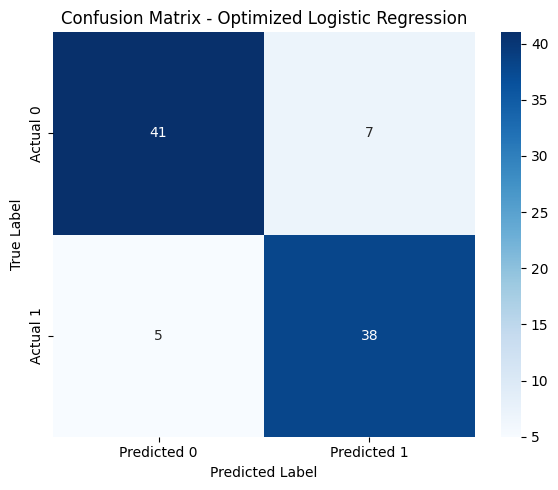

In [ ]:
# Compute confusion matrix
conf_matrix = confusion_matrix(y_test, final_predictions)

# Plot confusion matrix
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted 0', 'Predicted 1'], yticklabels=['Actual 0', 'Actual 1'])
plt.title('Confusion Matrix - Optimized Logistic Regression')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.tight_layout()
plt.show()

In [ ]:
perm_importance = permutation_importance(best_lr, X_train, y_train)

sorted_idx = (-perm_importance.importances_mean).argsort()

list_of_tuples  = list(zip(X_train.columns[sorted_idx],
                           perm_importance.importances_mean[sorted_idx]))

perm_importance = pd.DataFrame(list_of_tuples,
                  columns=['feature','permutation importance'])

perm_importance.head()

,feature,permutation importance
0,Ca,0.130189
1,MaxHR,0.040566
2,Sex,0.029245
3,Thal,0.026415
4,ExAng,0.013208


<Figure size 1200x600 with 0 Axes>

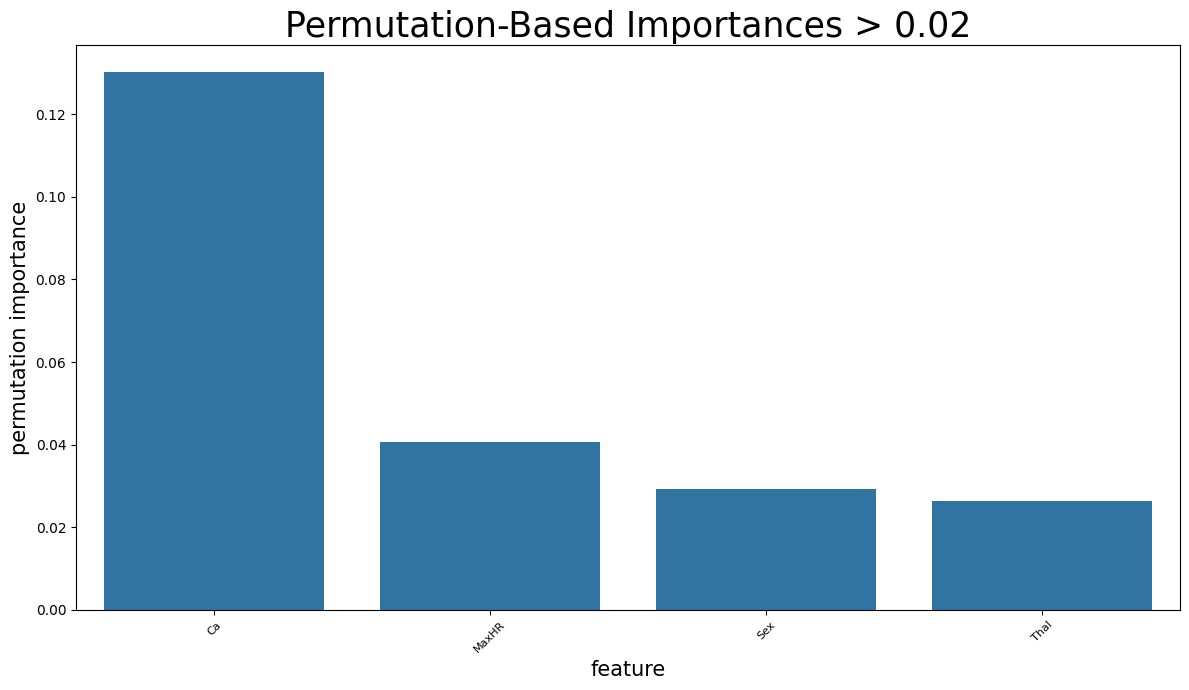

In [ ]:
bigfig = plt.figure(figsize=(12,6))

(top,bottom) = bigfig.subfigures(2,1)


### Bottom figure ###
bottom.subplots_adjust(left=.1,right=.9,wspace=.4,hspace=.4)

plt.figure(figsize=(12,7))

sns.barplot(perm_importance[perm_importance['permutation importance'] > 0.02], x='feature', y='permutation importance')

plt.title('Permutation-Based Importances > 0.02', fontsize=25)
plt.xlabel('feature', fontsize=15)
plt.xticks(fontsize=8, rotation=45)
plt.ylabel('permutation importance', fontsize=15)

plt.tight_layout()

In [ ]:
input_data = (1,63,1,0,145,233,1,2,150,0,2.3,3,0,1)

# Change the input data to a numpy array
input_data_as_numpy_array = np.asarray(input_data)

# Reshape the numpy array as we are predicting for only on instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)


prediction = best_lr.predict(input_data_reshaped)
print(prediction)

if(prediction[0] == 0):
  print("The Person does not have a Heart Disease\n")
else :
  print("The Person has a Heart Disease\n")

[0]
The Person does not have a Heart Disease

